In [0]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


LeNet5 Architecture with CrossEntropy loss function

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
np.random.seed(43)

/train-images.idx3-ubyte

In [0]:
path = untar_data(URLs.MNIST)

In [0]:
class MSELossFlat(nn.MSELoss): 
#“Same as `nn.MSELoss`, but flattens input and target.”
  def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
    use_cuda = torch.cuda.is_available()
    print(use_cuda)
    if use_cuda:
      y_matrix = torch.eye(10)[target].cuda()
    else:
      y_matrix = torch.eye(10)[target]
    return super().forward(input, y_matrix)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [0]:
il = ImageList.from_folder(path, convert_mode='L')

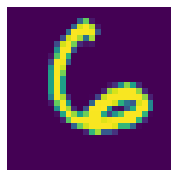

In [0]:
il[26500].show()

In [0]:
defaults.cmap= 'binary'

In [0]:
sd = il.split_by_folder(train='training', valid='testing')


In [0]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
ll = sd.label_from_folder()

In [0]:
x,y = ll.train[0]

3


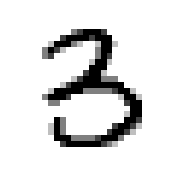

In [0]:
x.show()
print(y)

In [0]:
tfms = ([*rand_pad(padding=2, size=32, mode='zeros')], [*rand_pad(padding=2, size=32, mode='zeros')])

In [0]:
ll.transform(tfms)

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
bs = 128
ll.valid

LabelList (10000 items)
x: ImageList
Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32),Image (1, 32, 32)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png

In [0]:
data = ll.databunch(bs=bs).normalize()

In [0]:
x,y = data.train_ds[0]

3


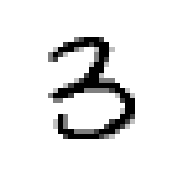

In [0]:
x.show()
print(y)

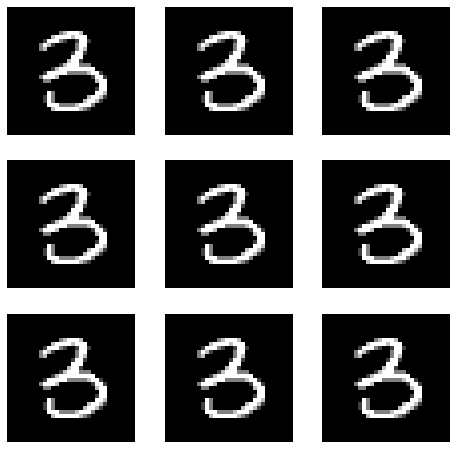

In [0]:

def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [0]:

xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 32, 32]), torch.Size([128]))

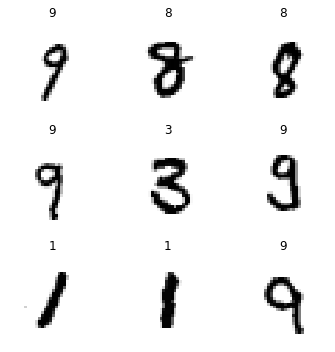

In [0]:
data.show_batch(rows=3, figsize=(5,5))

LeNet Architecture

In [0]:
model = nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5, stride = 1,padding = 0),
    #nn.Tanh(),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=(2,2),stride = 2),
    nn.Conv2d(6,16,kernel_size=(5,5), stride = 1),
    #nn.Tanh(),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=(2,2)),
    nn.Conv2d(16,120,kernel_size=(5,5), stride = 1),
    #nn.Tanh(),
    nn.ReLU(),
    Flatten(),
    nn.Linear(120,84),
    #nn.Tanh(),
    nn.ReLU(),
    nn.Linear(84,10),
    nn.Softmax(dim=1)


)

In [0]:

learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=[accuracy, error_rate])

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [6, 28, 28]          156        True      
______________________________________________________________________
ReLU                 [6, 28, 28]          0          False     
______________________________________________________________________
AvgPool2d            [6, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 10, 10]         2,416      True      
______________________________________________________________________
ReLU                 [16, 10, 10]         0          False     
______________________________________________________________________
AvgPool2d            [16, 5, 5]           0          False     
______________________________________________________________________
Conv2d               [120, 1, 1]          48,120     True      
___________________________________________________

In [0]:
xb = xb.cuda()

In [0]:
model(xb).shape

torch.Size([128, 10])

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


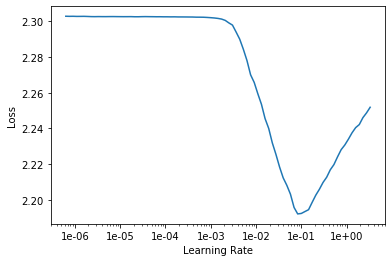

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-03)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.717703,1.719265,0.746200,0.253800,00:26
1,1.685575,1.624430,0.842300,0.157700,00:26
2,1.500369,1.493217,0.971100,0.028900,00:26
3,1.487058,1.485924,0.976100,0.023900,00:25
4,1.483627,1.483636,0.978600,0.021400,00:26


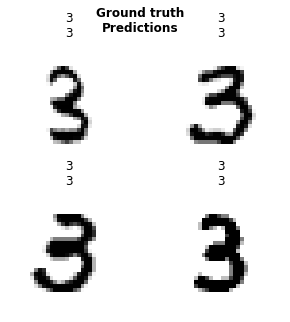

In [0]:
learn.show_results(ds_type = DatasetType.Valid, rows=2, figsize=(5,5))


In [0]:
learn.save('leNet5-MSELoss')

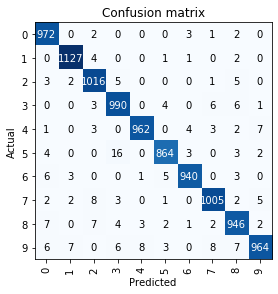

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('5', '3', 16),
 ('7', '2', 8),
 ('9', '4', 8),
 ('9', '7', 8),
 ('4', '9', 7),
 ('8', '0', 7),
 ('8', '2', 7),
 ('9', '1', 7),
 ('9', '8', 7),
 ('3', '7', 6),
 ('3', '8', 6),
 ('6', '0', 6),
 ('9', '0', 6),
 ('9', '3', 6),
 ('2', '3', 5),
 ('2', '8', 5),
 ('6', '5', 5),
 ('7', '9', 5),
 ('1', '2', 4),
 ('3', '5', 4),
 ('4', '6', 4),
 ('5', '0', 4),
 ('8', '3', 4),
 ('0', '6', 3),
 ('2', '0', 3),
 ('3', '2', 3),
 ('4', '2', 3),
 ('4', '7', 3),
 ('5', '6', 3),
 ('5', '8', 3),
 ('6', '1', 3),
 ('6', '8', 3),
 ('7', '3', 3),
 ('8', '4', 3),
 ('9', '5', 3),
 ('0', '2', 2),
 ('0', '8', 2),
 ('1', '8', 2),
 ('2', '1', 2),
 ('4', '8', 2),
 ('5', '9', 2),
 ('7', '0', 2),
 ('7', '1', 2),
 ('7', '8', 2),
 ('8', '5', 2),
 ('8', '7', 2),
 ('8', '9', 2),
 ('0', '7', 1),
 ('1', '5', 1),
 ('1', '6', 1),
 ('2', '7', 1),
 ('3', '9', 1),
 ('4', '0', 1),
 ('6', '4', 1),
 ('7', '5', 1),
 ('8', '6', 1)]

In [0]:
loses, idx = interp.top_losses()

In [0]:
x, y = data.valid_ds[idx[11]]

(Category 3, tensor(3), tensor([0.0853, 0.0853, 0.0853, 0.2320, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853,
        0.0853]))
2


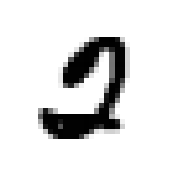

In [0]:
#data.valid_ds[6326][0].show()
x.show()
print(learn.predict(x))
print(y)
